# Delhi Metro Network Analysis

## Importing data from CSV file

In [70]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

## Importing data from CSV file

In [71]:
df = pd.read_csv("D:/Data Analysis/DAP exam/Delhi metro.csv")

In [72]:
df.head(10)

,ID (Station ID),Station Names,Dist. From First Station(km),Metro Line,Opened(Year),Layout,Latitude,Longitude
0,1,Shaheed Sthal(First Station),0.0,Red line,08-03-2019,Elevated,28.670611,77.415582
1,2,Hindon River,1.0,Red line,08-03-2019,Elevated,28.878965,77.415483
2,3,Arthala,2.5,Red line,08-03-2019,Elevated,28.676999,77.391892
3,4,Mohan Nagar,3.2,Red line,08-03-2019,Elevated,28.606319,77.106082
4,5,Shyam park,4.5,Red line,08-03-2019,Elevated,28.698807,28.698807
5,6,Major Mohit Sharma,5.7,Red line,08-03-2019,Elevated,28.677611,77.358143
6,7,Raj Bagh,6.9,Red line,08-03-2019,Elevated,28.640860,77.209500
7,8,Shaheed Nagar,8.2,Red line,08-03-2019,Elevated,28.530780,77.212057
8,9,Dilshad Garden,9.4,Red line,04-06-2008,Elevated,28.675920,77.321420
9,10,Jhil Mil,10.3,Red line,04-06-2008,Elevated,28.675790,77.312390


In [73]:
df.tail()

,ID (Station ID),Station Names,Dist. From First Station(km),Metro Line,Opened(Year),Layout,Latitude,Longitude
280,2,Shivaji Stadium,1.9,Orange line,23-02-2011,Underground,28.62901,77.21190
281,3,Dhaula Kuan [Conn: Pink],8.3,Orange line,15-08-2011,Elevated,28.59178,77.16155
282,4,Delhi Aerocity,14.5,Orange line,15-08-2011,Underground,28.54881,77.12092
283,5,IGI Airport,17.9,Orange line,23-02-2011,Underground,28.55693,77.08669
284,6,Dwarka Sector 21 [Conn: Blue],20.8,Orange line,23-02-2011,Underground,28.55226,77.05828


In [74]:
df.shape

(285, 8)

## Exploratory Data Analysis

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID (Station ID)               285 non-null    int64  
 1   Station Names                 285 non-null    object 
 2   Dist. From First Station(km)  285 non-null    float64
 3   Metro Line                    285 non-null    object 
 4   Opened(Year)                  285 non-null    object 
 5   Layout                        285 non-null    object 
 6   Latitude                      285 non-null    float64
 7   Longitude                     285 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 17.9+ KB


In [76]:
df.describe()

,ID (Station ID),Dist. From First Station(km),Latitude,Longitude
count,285.000000,285.000000,285.000000,285.000000
mean,16.214035,19.218947,28.595428,77.029315
std,11.461808,14.002862,0.091316,2.875400
min,1.000000,0.000000,27.920862,28.698807
25%,6.000000,7.300000,28.545828,77.107130
50%,14.000000,17.400000,28.613453,77.207220
75%,24.000000,28.800000,28.666360,77.281165
max,49.000000,52.700000,28.878965,77.554479


In [77]:
# Check for missing values
df.isnull().sum()

ID (Station ID)                 0
Station Names                   0
Dist. From First Station(km)    0
Metro Line                      0
Opened(Year)                    0
Layout                          0
Latitude                        0
Longitude                       0
dtype: int64

In [78]:
# Drop rows with any null values
df_cleaned = df.dropna()

In [79]:
df_cleaned.isnull().sum()

ID (Station ID)                 0
Station Names                   0
Dist. From First Station(km)    0
Metro Line                      0
Opened(Year)                    0
Layout                          0
Latitude                        0
Longitude                       0
dtype: int64

## Import Libraries

In [80]:
from seaborn import pairplot
import seaborn as sns
import folium
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_white"
%matplotlib inline

In [81]:
# Print unique values in the 'Metro Line' column
print(df_cleaned['Metro Line'].unique())

['Red line' 'Yellow line' 'Blue line' 'Blue line branch'
 'Green line branch' 'Green line' 'Rapid Metro' 'Voilet line'
 'Magenta line' 'Pink line' 'Aqua line' 'Gray line' 'Orange line']


## Pie Plot for Metro Line

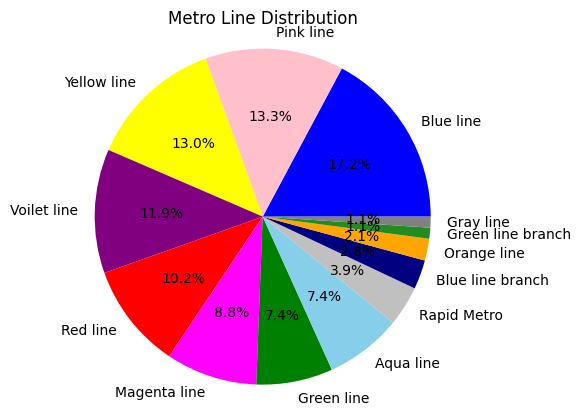

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary to map Metro Line names to colors
line_colors = {
    'Red line': 'red',
    'Yellow line': 'yellow',
    'Blue line': 'blue',
    'Blue line branch': 'navy',
    'Green line branch': 'forestgreen',
    'Green line': 'green',
    'Rapid Metro': 'silver',
    'Voilet line': 'purple',
    'Magenta line': 'magenta',
    'Pink line': 'pink',
    'Aqua line': 'skyblue',
    'Gray line': 'gray',
    'Orange line': 'orange'
}

# Calculate value counts for each Metro Line
line_counts = df_cleaned['Metro Line'].value_counts()

# Create a pie chart using custom colors
plt.pie(line_counts, labels=line_counts.index, autopct='%1.1f%%', colors=[line_colors[line] for line in line_counts.index])

# Set aspect ratio to be equal, so the pie is drawn as a circle.
plt.axis('equal')

# Add a title
plt.title('Metro Line Distribution')

# Display the pie chart
plt.show()

## Creating an Interactive Map of Delhi Metro Stations

In [83]:
# Create a base map centered on Delhi
delhi_map = folium.Map(location=[28.6139, 77.2090], zoom_start=12)

# Add markers for each metro station
for index, row in df_cleaned.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Station Names']).add_to(delhi_map)

# Display the map
display(delhi_map)

## Metro Line Analysis

## Bar Plot of Station Counts by Metro Line:

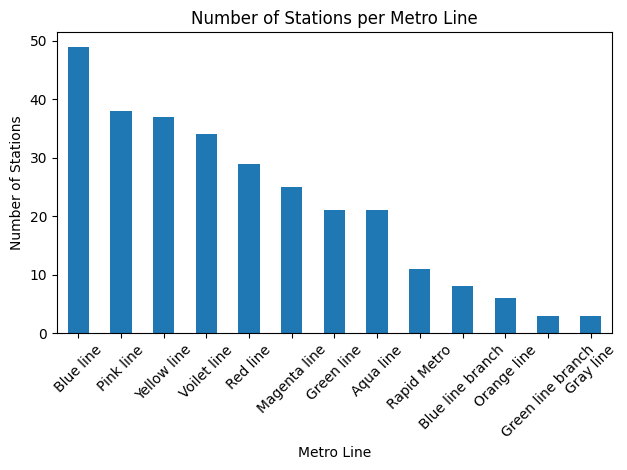

In [84]:
df['Metro Line'].value_counts().plot(kind='bar')
plt.xlabel('Metro Line')
plt.ylabel('Number of Stations')
plt.title('Number of Stations per Metro Line')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Histogram of Distance from First Station:

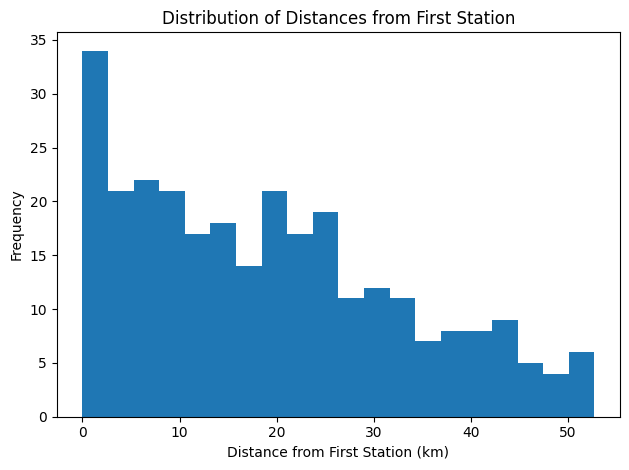

In [85]:
plt.hist(df_cleaned['Dist. From First Station(km)'], bins=20)
plt.xlabel('Distance from First Station (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Distances from First Station')
plt.tight_layout()
plt.show()

## Line Plot of Yearly Openings:

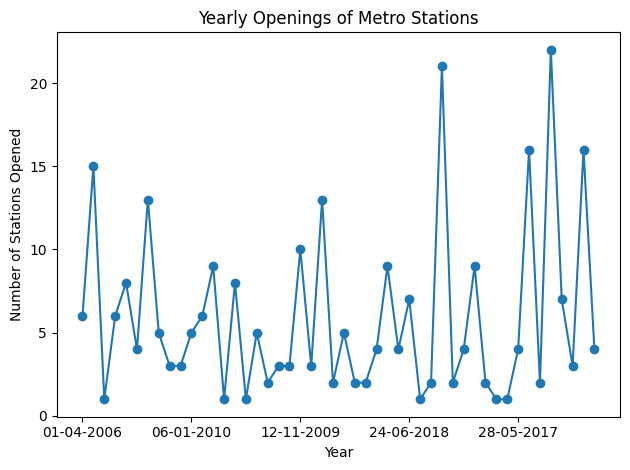

In [86]:
yearly_openings = df.groupby('Opened(Year)').size()
yearly_openings.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Stations Opened')
plt.title('Yearly Openings of Metro Stations')
plt.tight_layout()
plt.show()

## Bar Plot of Layout by Metro Line:

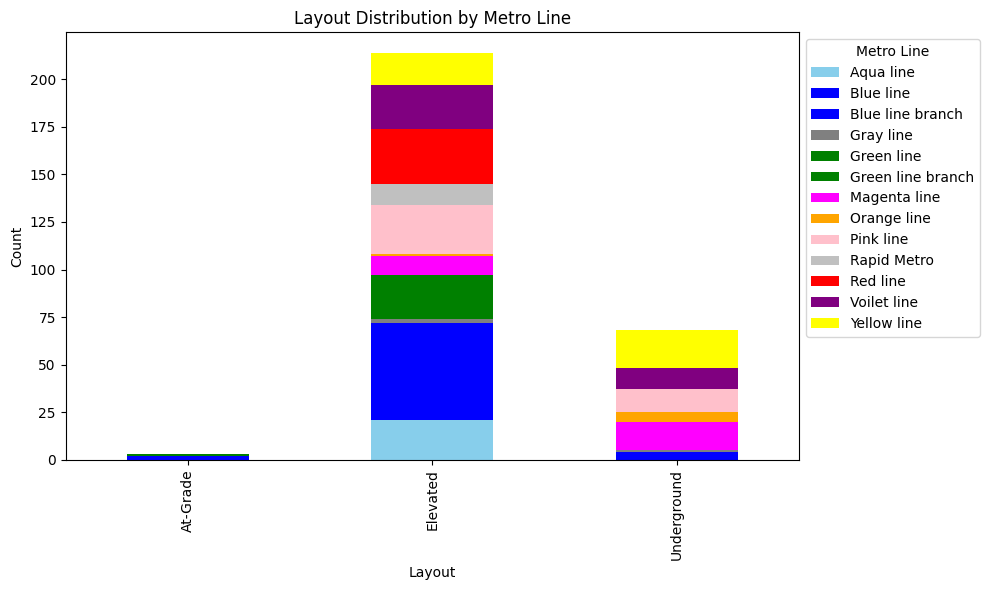

In [87]:
# Create a cross-tabulation of Layouts and Metro Lines
layout_by_line = pd.crosstab(df_cleaned['Layout'], df_cleaned['Metro Line'])

# Define line colors according to the pattern
line_colors = {
    'Red line': 'red',
    'Yellow line': 'yellow',
    'Blue line': 'blue',
    'Blue line branch': 'blue',
    'Green line branch': 'green',
    'Green line': 'green',
    'Rapid Metro': 'silver',
    'Voilet line': 'purple',  
    'Magenta line': 'magenta',
    'Pink line': 'pink',
    'Aqua line': 'skyblue',
    'Gray line': 'gray',
    'Orange line': 'orange'
}

# Create a list of colors corresponding to each line
colors = [line_colors[line] for line in layout_by_line.columns]

# Plot a stacked bar plot with specified colors
layout_by_line.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.xlabel('Layout')
plt.ylabel('Count')
plt.title('Layout Distribution by Metro Line')
plt.legend(title='Metro Line', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

## Station Layout Analysis

In [88]:
layout_counts = df_cleaned['Layout'].value_counts()

# creating the bar plot using Plotly
fig = px.bar(x=layout_counts.index, y=layout_counts.values,
             labels={'x': 'Layout', 'y': 'Number of Stations'},
             title='Distribution of Delhi Metro Station Layouts',
             color=layout_counts.index,
             color_continuous_scale='pastel')

# updating layout for better presentation
fig.update_layout(xaxis_title="Layout",
                  yaxis_title="Number of Stations",
                  coloraxis_showscale=False,
                  template="plotly_white")

fig.show()

# MAPPING OUT

In [89]:
pip install folium

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



## LAYOUT ACROSS GEOGRAPHY

In [90]:
import folium
m = folium.Map((28.614740,77.207270))


for index,row in df.iterrows():
    if row['Layout']=='Elevated':
        c = 'blue'
    elif row['Layout']=='Underground':
        c='green'
    elif row['Layout']=='At-Grade':
        c='brown'
    else:
        c='red'
    
    folium.CircleMarker(
    location=[row['Latitude'],row['Longitude']],
    tooltip=row['Station Names'],
    popup=row['ID (Station ID)'],
    radius=4,
    fill=True,
    color=c,
    opacity=5,
    fill_color=c,
    
    ).add_to(m)
m

## Observations:

Elevated Stations: Most of the stations are elevated. In metropolitan locations, it is a typical design decision to conserve space and lessen land acquisition concerns.<br>
Underground Stations: In comparison to Elevated stations, there are fewer stations below ground. These are probably in central or heavily inhabited locations, where it is less practical to build above ground.<br>
At-Grade Stations: The scarcity of At-Grade (ground level) stations in the network suggests that they are less common, perhaps because of land and traffic issues.

## Summary:

Metro Network Analysis involves examining the network of metro systems to understand their structure, efficiency, and effectiveness. Analyzing routes, stations, traffic, connectivity, and other operational factors are usually included.